<!DOCTYPE html>

<html>

<head>

<title>Magos da Furadeira</title>

</head>

<body>

<div style="display: flex; align-items: center;">

<img src="https://i.ibb.co/z490FF5/FUNDO-REMOVIDO.png" alt="FUNDO REMOVIDO">

<p style="margin-left: 40px; font-size: 24px; font-weight: bold; border-bottom: 1px solid black;">José David e Gabriel Torquarto - <br> Magos da Furadeira Bosch de Impacto </p>

</div>

</body>

</html>

 

Dados 2
Normalizando e transformando dados

ID: Dados 02

Proponente: Patrulheiro Formidável Amarelo

Objetivo: Escolha um conjunto de dados qualquer que contenha pelo menos 1 coluna com dados numéricos (pode ser atributo ou target, tanto faz). Faça operações de normalização e transformação neste dataset e observe o que acontece.

Comentários adicionais: Não é para intercalar operações de normalização e transformação, basta executar estas operações e observar o resultado.

Pontuação máxima: 10 pontos

In [17]:
import seaborn as sbn

Nesta atividade usaremos a biblioteca seaborn (como sbn) pois ela contém todas as funções necessárias para normalizarmos os dados.
Para essa atividade utilizamos um dataset com dados referentes a diamantes, tais como cor, preço, corte, peso e claridade. No entanto, a coluna a ser trabalhada será a de preços, que demonstrou maior variância.

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74



 Tipos de variável:
 carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

 Tipos de variável(convertidas):
 carat       Float64
cut        category
color      category
clarity    category
depth       Float64
table       Float64
price         Int64
x           Float64
y           Float64
z           Float64
dtype: object


<Axes: xlabel='price', ylabel='Count'>

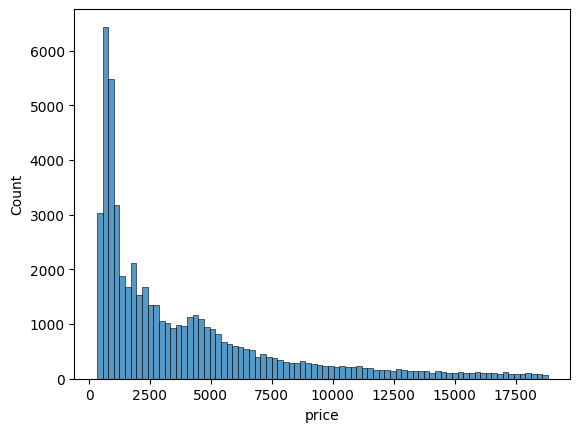

In [18]:
diamantes = sbn.load_dataset('diamonds', cache=True, data_home=None)
display(diamantes)
print("\n Tipos de variável:\n", diamantes.dtypes)
print("\n Tipos de variável(convertidas):\n", diamantes.convert_dtypes().dtypes)
sbn.histplot(x = diamantes['price'])

No histograma acima está representada a distribuição de preços de cada diamante. Note que a distribuição é bem desigual, tendo valores exorbitantemente superiores a outros.

C:\Users\gabriel23041\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


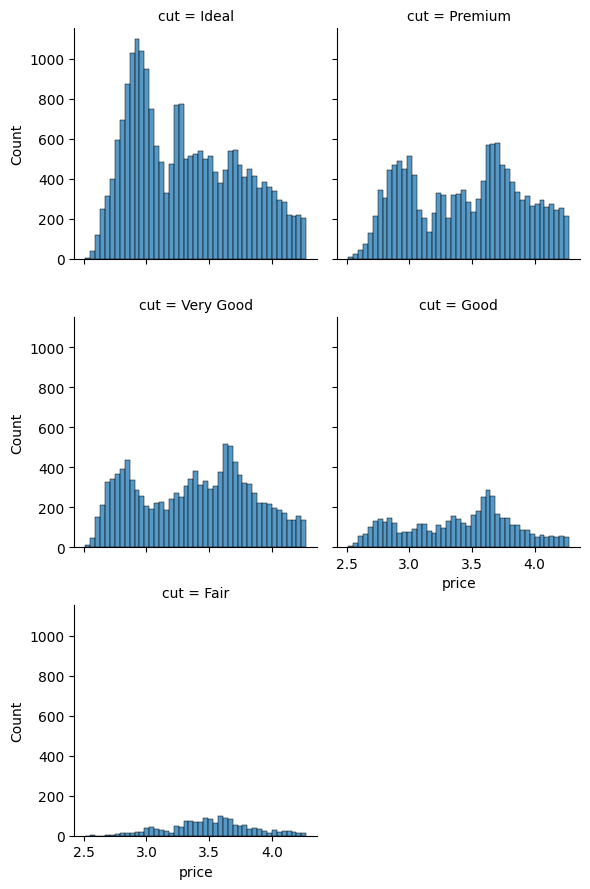

In [43]:
sbn.displot(diamantes, x = 'price', col = 'cut',col_wrap=2, height=3,)

In [24]:
import numpy as np
copia_diamentes = diamantes.copy()

copia_diamentes["price"] = np.log10(copia_diamentes["price"])
print(copia_diamentes['price'])

0        0.400230
1        0.400230
2        0.400460
3        0.402046
4        0.402269
           ...   
53935    0.536614
53936    0.536614
53937    0.536614
53938    0.536614
53939    0.536614
Name: price, Length: 53940, dtype: float64


In [25]:
media = diamantes['price'].mean()
desvio_padrao = diamantes['price'].std()

diamantes['diamantes_zscore'] = (diamantes['price'] - media) / desvio_padrao

print(diamantes['price'])

0        2.513218
1        2.513218
2        2.514548
3        2.523746
4        2.525045
           ...   
53935    3.440437
53936    3.440437
53937    3.440437
53938    3.440437
53939    3.440437
Name: price, Length: 53940, dtype: float64
